# Trajetória do Carrinho

Esta rotina recebe como input uma sequência de fotos de um carrinho de brinquedo e gera como output uma imagem preta com a rota traçada por ele.

## Importa Bibliotecas

In [505]:
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual
from scipy import stats

## Importa e visualiza imagens

In [506]:
# Create list to store images
images = []

# Define path where images are stored
FILEPATH = "img/"

# Load images
for x in range(0,13):
    
    f = x+3
    
    # Name file
    filename = "shot00%.02d.png" %f
    
    # File path
    path = FILEPATH + filename
    
    # Load image in gray scale
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Add image to list of images
    images.append(gray)
    
# Visualize images
def show_image(index):
    
    # Global variables
    global images, img, diff_img
    
    # Get specific image
    gray = images[index]
    
    # Show image
    plt.imshow(gray, 'gray')
    
# Select image from list iteractively
interactive(show_image, index = (0,12))
    

interactive(children=(IntSlider(value=6, description='index', max=12), Output()), _dom_classes=('widget-intera…

Selecione o índice da imagem no slider "index" para visualizar todas as imagens carregadas

## Corrige cor da imagem 4 e visualiza resultados

In [507]:
# Torna imagem[4] mais clara
images[4] = images[4]*2

# Visualiza imagem selecionada
def show_image(index):
    
    # Global variables
    global images, img, images_diff
    
    # Get specific image
    gray = images[index]
    
     # Show image
    plt.imshow(gray, 'gray')
    
# Select image from list iteractively
interactive(show_image, index = (0,12))

interactive(children=(IntSlider(value=6, description='index', max=12), Output()), _dom_classes=('widget-intera…

Selecione o índice da imagem no slider "index" para visualizar todas as imagens carregadas

## Cria imagem de referência combinando duas imagens

As seguintes imagens foram selecionadas por conveniência para que combinadas resultem em uma imagem onde o carrinho não está presente:

- images[0] - Primeira imagem: colunas 0 a 1249 não contem partes do carrinho
- images[5] - Sexta imagem: colunas 1250 a 1920 não contem partes do carrinho

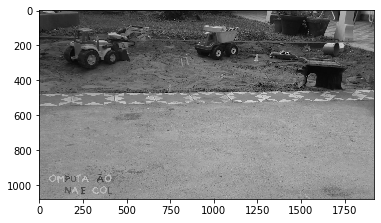

In [508]:
# Imagens de referência:
    # images[0] colunas 0 a 1250
    # images[5] colunas 1250 a 1920
    
# Define number of rows and columns of reference image
rows = images[0].shape[0]
columns = images[0].shape[1]

# Define reference image
image_ref = np.ones((rows, columns),np.uint8)
    
# Build reference image combining two other images
for row in range(0,rows):
    for column in range (0, columns):
        if (column < 1250):
            image_ref[row,column] = images[0][row,column]
        else:
            image_ref[row,column] = images[5][row,column]
        
plt.imshow(image_ref, 'gray')

Imagem resultante não contém o carrinho

## Cria lista com diferenças entre imagens e imagem de referência

In [509]:
# Create list to store differences between images and reference image
images_diff = []

# Iterate over all images and compute differences
for i in range(0,13):
    
    # Calculate differences
    images_diff.append(cv2.absdiff(images[i], image_ref))   
    
    
# Visualize selected image
def show_image(index):
    
    # Global variables
    global images, img, diff_img
    
    # Show image
    plt.imshow(images_diff[index], 'gray')
    
# Visualize calculated images
interactive(show_image, index = (0,12)) 

interactive(children=(IntSlider(value=6, description='index', max=12), Output()), _dom_classes=('widget-intera…

Selecione o índice da imagem no slider "index" para visualizar todas as imagens carregadas

# Filtra imagens usando threshold binario

In [510]:
# Create list to store filtered images
images_dst = []

# Define selected threshold
thresh = 50

# Define modes
modes = ['cv2.THRESH_BINARY',
         'cv2.THRESH_BINARY_INV',
         'cv2.THRESH_TRUNC',
         'cv2.THRESH_TOZERO',
         'cv2.THRESH_TOZERO_INV']

# Iterate over list of previously calculated image differences and filter the result
for i in range(0,13):
    
    # Filter image using threshold binary
    th, dst = cv2.threshold(images_diff[i], thresh, 255, eval(modes[0]))
    
    # Add image to list of filtered images
    images_dst.append(dst)   
    
    
# Visualize results
def show_image(index):
    
    # Global variables
    global images, img, images_dst
    
    # Show image
    plt.imshow(images_dst[index], 'gray')
    
# Show selected image from filtered list
interactive(show_image, index = (0,12))     

interactive(children=(IntSlider(value=6, description='index', max=12), Output()), _dom_classes=('widget-intera…

Selecione o índice da imagem no slider "index" para visualizar todas as imagens carregadas

## Abre imagem com kernel

Um kernel do tipo MORPH_ELLIPSE de 13 x 13 se mostrou suficiente para atingir o objetivo desejado

In [511]:
# Define opening kernel shape and size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
kernel

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [512]:
# Create list to store images opened with selected kernel
images_opening = []

# Iterate through filtered images 
for i in range(0,13):
    
    # Open image with selected kernel
    opening = cv2.morphologyEx(images_dst[i], cv2.MORPH_OPEN, kernel)
    
    # Add image to list of opened images
    images_opening.append(opening)
    
# Visualize selected image
def show_image(index):
    
    # Global variables
    global images, img, images_opening
    
    # Show image
    plt.imshow(images_opening[index], 'gray')
    
# Show selected result
interactive(show_image, index = (0,12))   

interactive(children=(IntSlider(value=6, description='index', max=12), Output()), _dom_classes=('widget-intera…

Selecione o índice da imagem no slider "index" para visualizar todas as imagens carregadas

# Fecha imagem com kernel e encontra centroides de cada imagem

In [513]:
# Define closing kernel shape and size
kernel2 = np.ones((75,75),np.uint8)
kernel2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [514]:
# Create list of images to be closed with the selected kernel
images_closing = []

# Create list of X and Y centroid components
cX = []
cY = []

# Iterate through all images previously opened, close them and calculate moments of the image
for i in range(0,13):
    
    # Close the images with selected kernel
    closing = cv2.morphologyEx(images_opening[i], cv2.MORPH_CLOSE, kernel2)
    
    # Add image to list of closed images
    images_closing.append(closing)
    
    # Calculate moments of binary image
    M = cv2.moments(images_closing[i])
    
    # Add cX and cY values of every image to respective lists
    cX.append(int(M["m10"] / M["m00"]))
    cY.append(int(M["m01"] / M["m00"]))

## Visualiza resultado

Mude a barra "label" para iterar por todas as imagens. Os centróides desenhados correspondem aos centróides das imagens de índice menor ou igual ao índice selecionado

In [515]:
# Visualize selected image and centroids
def show_image(index):
    
    # Referencia variavel global
    global images, img, images_closing
    
    # Set the size to show
    plt.figure(figsize = (12,10))
    
    # Show selected image
    plt.imshow(images_closing[index], 'gray')
    
    # Show vehicle path from frame 0 to selected frame
    plt.plot(cX[0:index+1],cY[0:index+1], 'o-')
    
# Select item and plot image iteractively
interactive(show_image, index = (0,12))

interactive(children=(IntSlider(value=6, description='index', max=12), Output()), _dom_classes=('widget-intera…

Selecione o índice da imagem no slider "index" para visualizar todas as imagens carregadas